# Problem Set 04A - Knapsack Problem

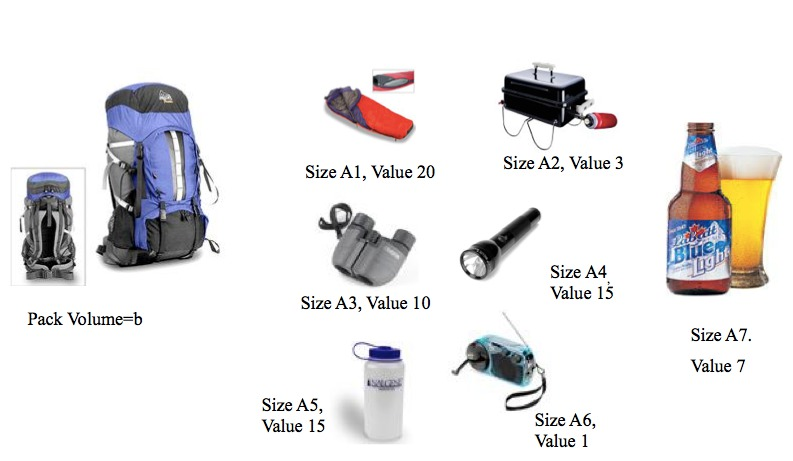

In [36]:
from IPython.display import Image
Image(filename='imgs/ks.jpg') 

Tenemos $n$ objectos numerados del $0$ a $n-1$, con un tamaño $s_i$ y valor $v_i$ cada uno. Una solución cualquiera del problema es el vector $X=[x_0, x_2, ..., x_i, ... x_{n-1}]$, en donde $x_i \in \{0,1\}$ indica si el objecto $i$ se incluye o no la mochila. Como la mochila tiene un volumen máximo, $KS_{vol}$ el problema se formula de la siguiente manera:

$$ maximize \; X \;\; \sum_{i=0}^{n-1} x_i v_i$$

$$subject \; to \;\; \sum_{i=0}^{n-1} x_i s_i \le KS_{vol}$$

El vector $S=[s_0, s_2, ..., s_i, ... s_{n-1}]$ representa los tamaños de todos los objectos y el vector $V=[v_0, v_2, ..., v_i, ... v_{n-1}]$, los valores.

Fíjate a continuación cómo:

- generamos vectores $S$ y $V$ aleatorios
- generamos soluciones aleatorias
- verificamos si las soluciones generadas son válidas

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_objects         = 10
max_object_value  = 100
max_object_volume = 50
KS_volume         = 50

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

print ("values ", object_values)
print ("sizes", object_volumes)

def KS_isvalid(solution, object_volumes, KS_volume):
    return np.sum(solution*object_volumes)<=KS_volume

for i in range(10):
    solution = np.random.randint(2, size=len(object_volumes))
    print ("solution", i, solution, KS_isvalid(solution, object_volumes, KS_volume))

values  [55 38 13 66 52 63 57 21 88 87]
sizes [17 38 35 24  5 42 48  7  6 18]
solution 0 [1 1 1 1 0 0 0 0 1 1] False
solution 1 [0 1 0 0 0 0 1 0 0 1] False
solution 2 [1 1 1 1 1 1 0 0 0 1] False
solution 3 [0 1 0 0 1 1 1 0 0 0] False
solution 4 [0 1 0 1 1 1 1 0 1 1] False
solution 5 [0 1 1 0 0 0 0 1 1 0] False
solution 6 [1 1 0 1 1 1 0 0 1 0] False
solution 7 [1 0 1 0 1 0 1 0 1 1] False
solution 8 [0 0 0 0 0 0 0 0 1 0] True
solution 9 [0 1 1 1 1 1 0 1 1 1] False


**HAZTE LA SIGUIENTE PREGUNTA** ¿Cuál es la probabilidad de que una solución aleatoria sea válida?

## Ejercicio 1: Inicialización de la población

Crea una función para crear una población de soluciones aleatorias. Ten en cuenta que 

- **TODAS LAS SOLUCIONES HAN DE SER VÁLIDAS**.
- Si creas soluciones aleatorias y las descartas si no son válidas seguramente tu código tarde mucho en generar la población si la probablidad de que una solución aleatoria sea válida es muy pequeña
- Tu código ha de devolver un array numpy de números enteros

Ejecución de ejemplo

    n_objects         = 20
    KS_volume         = 50
    n_individuals     = 10
    pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)
    print pop

Salida esperada (la población es aleatoria, tu salida probablemente sea distinta)

      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

   

In [42]:
def KS_initialize_population(n_individuals, object_volumes, KS_volume):
    # TU CODIGO AQUI
    #object_volumes -> arreglo con valores iniciales
    #volumes_idx_sorted[:len(volumes_idx_sorted)-len(volumes_sorted)] -> arreglo con indices de los volumenes ordenados
    
    population =[]
    
    #Primer filtro (Valores menores a KS_volume)
    volumes_idx_sorted =np.argsort(object_volumes)
    volumes_sorted = list(map(lambda x: object_volumes[x], list(filter(lambda x: object_volumes[x]<=KS_volume, volumes_idx_sorted))))  
   # num_item_NOValid = len(volumes_idx_sorted)-len(volumes_sorted)
    num_item_Valid = len(volumes_sorted)
    for individual in range(n_individuals):
        solution= np.zeros(len(object_volumes))
        num_item= np.random.choice(num_item_Valid, 1)
        idx_item= np.random.choice(num_item_Valid, num_item,replace = False)
        acum_vol = 0
        for ID_item in idx_item:
            if acum_vol + volumes_sorted[ID_item]<=KS_volume:  
                acum_vol+= volumes_sorted[ID_item]
                solution[volumes_idx_sorted[ID_item]]=1
        population.append(solution)
    
    return np.array(population)

Verifica tu código

In [56]:
n_objects         = 50
max_object_value  = 100
max_object_volume = 50
KS_volume         = 50

n_individuals     = 100
object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)

n_invalid = np.sum([1 for i in pop if not KS_isvalid(i, object_volumes, KS_volume)])

if n_invalid != 0:
    print ("INCORRECTO!! Hay", n_invalid, "soluciones inválidas")
else:
    print ("CORRECTO!!")

CORRECTO!!


## Ejercicio 2: Función de coste

El valor máximo que tendríamos si pudiéramos incluir todos los objetos en la mochila sería $V_{max}=\sum v_i$. El volumen de los objetos incluidos en una solución $X$ es $S(X)=\sum s_i x_i$. El valor de todos los objetos incluidos en una solución es $V(X)=\sum v_i x_i$

Crea una función de coste de manera que valores altos de las combinaciones de objetos representen un coste bajo, siempre y cuando no excedan la capacidad de la mochila. Observa que nuestra implementación de GA **MINIMIZA** un coste y nosotros queremos **MAXIMIZAR** un valor.


$$    KS\_cost(X)=\left\{
                \begin{array}{ll}
                  V_{max} - V(X) & si \;\; S(X) \le KS_{vol}\\
                  V_{max} & si \;\; S(X) \gt KS_{vol}\\
                \end{array}
              \right.
              $$

In [70]:
def KS_cost(solution, object_values, object_volumes, KS_volume):
    # TU CODIGO AQUI
    vmax = np.sum(object_values)
    sx=np.sum(solution*object_volumes)
    cost= vmax
    if(sx<=KS_volume):
        cost = vmax- np.sum(solution*object_values)
    return cost

Comprueba tu código. La gráfica generada tiene que tener aproximadamente la siguiente forma:

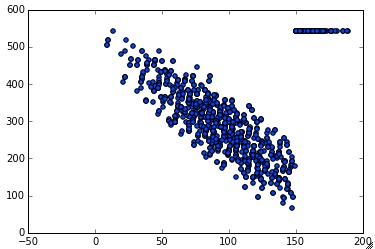

In [71]:
from IPython.display import Image
Image(filename='imgs/kscost.jpg') 

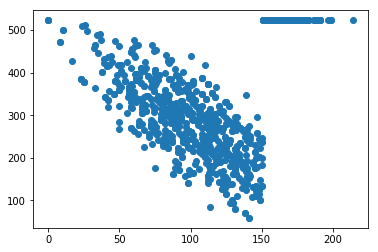

In [85]:
n_objects         = 10
max_object_value  = 100
max_object_volume = 40
KS_volume         = 150

n_individuals     = 1000

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)

pop = np.random.randint(2, size=(n_individuals, len(object_volumes)))

vols = [np.sum(i*object_volumes) for i in pop]
costs = [KS_cost(i, object_values, object_volumes, KS_volume) for i in pop]

plt.scatter(vols, costs)

## Ejercicio 3: Función de mutación

Crea una función de mutación que, con probabilidad $mutation\_prob$ genere una mutación **VALIDA** de un bit de una solución.

Ejemplo de ejecución:

    sol = np.array([0 0 0 0 1 0 1 1 0 0])
    print KS_mutate(pop[1], 0.9, object_volumes, KS_volume)
    
Salida esperada (sujeto a procesos aleatorios):

    > [0 0 0 0 1 0 1 0 0 0]

In [97]:
def KS_mutate(solution, mutation_prob, object_volumes, KS_volume):
    # TU CODIGO AQUI
    """
    TODO: add max value optimization, in that code just minimize the volume
    """
    
    mutated_solution = np.copy(solution) # copia de la solucion la cual será mutada

    if np.random.random()<mutation_prob:
        sx = np.sum(solution*object_volumes)
        volumes_idx_sorted =np.argsort(-object_volumes)
        mutation_flag = False
        #volumes_sorted = list(map(lambda x: object_volumes[x], list(filter(lambda x: object_volumes[x]<=KS_volume, volumes_idx_sorted))))  
        unos, = np.where(mutated_solution == 1)
        for idx_vol in volumes_idx_sorted:
            if(object_volumes[idx_vol]+sx<=KS_volume):
                mutated_solution[idx_vol]=1
                mutation_flag=True
                return mutated_solution
            
        if not mutation_flag:
            minor = 999999999
            idx = 9999999999
            for un in unos:
                if( object_volumes[un]<minor):
                    minor = object_volumes[un]
                    idx = un
            mutated_solution[idx]=0
            
    return mutated_solution

Comprueba tu código

In [90]:
n_objects         = 50
max_object_value  = 100
max_object_volume = 50
KS_volume         = 30

n_individuals     = 1000

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)

mutation_prob     = 0.1

diffs = []
for i in pop:
    m = KS_mutate(i, mutation_prob, object_volumes, KS_volume)
    diffs.append(np.sum((m-i)**2))

h = np.histogram(diffs, bins=2)

if not np.allclose(np.unique(diffs), np.array([0,1])):
    print ("INCORRECTO!! solo pueden haber mutaciones de 1 bit")

freq_1 = h[0][1]*1./n_individuals
if np.abs(freq_1-mutation_prob)>0.1:
    print ("INCORRECTO!! frecuencia de mutación observada difiere demasiado de", mutation_prob)
else:
    print ("CORRECTO!!")

CORRECTO!!


## Ya está! Usaremos la siguiente función de _crossover_

In [91]:
def KS_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1

    r = np.zeros(l).astype(int)
    r[:cstart]     = solution1[:cstart]
    r[cstart:cend] = solution2[cstart:cend]
    r[cend:]       = solution1[cend:]            
    return r

## Creamos un problema KS con volúmenes y valores para objectos

In [92]:
%run code/ga.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_objects         = 50
KS_volume         = 100
mutation_prob     = 0.1
crossover_prob    = 0.5

object_values  = np.array([36, 20, 47, 53, 55, 46, 48, 66,  1,  6, 13, 59, 95,  7, 54, 32, 76, 63, 76, 19,  2, 17, 16, 12, 78,
 67, 44, 20, 41, 26, 24, 68, 55, 53, 35, 49, 46, 46, 16, 64, 41, 27,  8, 30, 76, 92, 85, 81, 84, 98])
object_volumes = np.array([ 8, 47, 16,  8, 41, 11, 45, 34, 26, 48, 16,  8, 10, 13, 28,  6,  7, 11,  8, 27, 44, 30, 25, 23, 45,
  3, 12, 12, 23,  3, 37, 10, 47, 46, 27, 10, 30,  8,  2, 47,  4, 44, 43, 37, 22, 20,  1, 17, 42, 27])


print ("total volume of objects", np.sum(object_volumes))
print ("knapsack max volume    ", KS_volume)
print ("total value of objects ", np.sum(object_values))

print (object_values)
print (object_volumes)

total volume of objects 1159
knapsack max volume     100
total value of objects  2273
[36 20 47 53 55 46 48 66  1  6 13 59 95  7 54 32 76 63 76 19  2 17 16 12 78
 67 44 20 41 26 24 68 55 53 35 49 46 46 16 64 41 27  8 30 76 92 85 81 84 98]
[ 8 47 16  8 41 11 45 34 26 48 16  8 10 13 28  6  7 11  8 27 44 30 25 23 45
  3 12 12 23  3 37 10 47 46 27 10 30  8  2 47  4 44 43 37 22 20  1 17 42 27]


## Y vemos cómo se comporta con distintos valores de las probabilidades de mutación y crossover

Deberemos de observar cómo el problema está dominado por la probabilidad de mutación

best knapsack is [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 1 0 0] cost 1493 value 780 volume 100


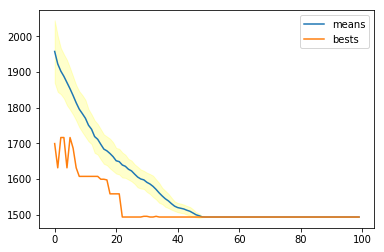

In [93]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.5,
               mutation_prob            = 0.5, 
               n_iters                  = 100)

best, best_costs, means, stds = r
print ("best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)

best knapsack is [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 0] cost 1454 value 819 volume 99


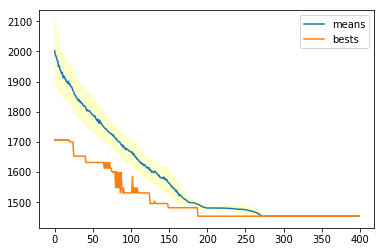

In [94]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.9,
               mutation_prob            = 0.9, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print ("best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)

best knapsack is [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 1 0 0] cost 1474 value 799 volume 100


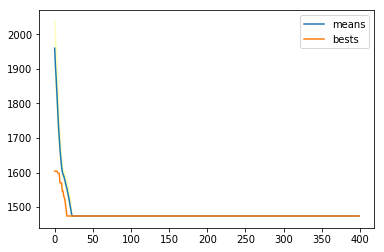

In [95]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.1,
               mutation_prob            = 0.1, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print ("best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)

best knapsack is [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0] cost 1459 value 814 volume 99


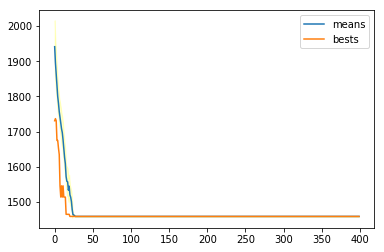

In [96]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.1,
               mutation_prob            = 1.0, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print ("best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)